In [2]:
import os
import yaml
import numpy as np
from math import sqrt,log10
import pylab as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d as interp

%matplotlib inline

In [13]:
files = os.listdir('results')
params = np.empty([len(files),5])
param_files = [f for f in files if 'params' in f]

In [64]:
J_arr = np.empty_like(param_files, dtype=float)
L_arr = np.empty_like(param_files, dtype=float)
r_arr = np.empty_like(param_files, dtype=float)
a_arr = np.empty_like(param_files, dtype=float)
b_arr = np.empty_like(param_files, dtype=float)
c_arr = np.empty_like(param_files, dtype=float)
for i,f in enumerate(sorted(param_files, key= lambda x : x.split('_')[1].split('.')[0])):
    results = np.load('results/'+f)
    J_arr[i] = float(f.split('_')[1].split('.')[0])/1000.
    L_arr[i] = results[0]
    a_arr[i] = results[1]
    b_arr[i] = results[2]
    c_arr[i] = results[3]
    r_arr[i] = results[4]

In [66]:
interp_L = interp(J_arr, L_arr-L_arr.min())
for par in ['a', 'b', 'c', 'r']:
    exec( 'interp_{p} = interp(J_arr, {p}_arr)'.format(p=par))

In [67]:
eval_Like_J = np.linspace(J_arr.min(), J_arr.max(), 1e3)
min_Like_J = interp_L(eval_Like_J).min()
Jmin = eval_Like_J[ np.where( interp_L(eval_Like_J) == min_Like_J )[0][0] ]
J_plt = np.linspace(J_arr.min(),J_arr.max())

In [68]:
Jr = float(interp_r(Jmin))
Ja = float(interp_a(Jmin))
Jb = float(interp_b(Jmin))
Jc = float(interp_c(Jmin))

In [69]:
print 'r = %.2f, a = %.2f, b = %.2f, c = %.2f'%(Jr, Ja, Jb, Jc)

r = 2.16, a = 0.66, b = 4.32, c = 0.95


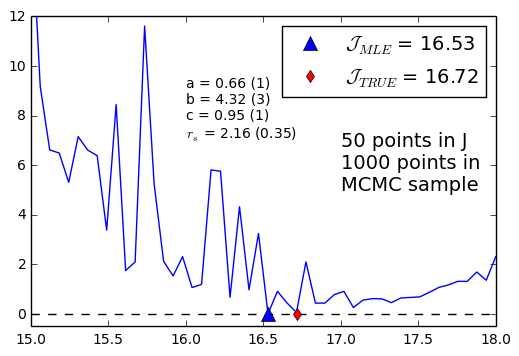

In [80]:
plt.plot(J_plt, interp_L(J_plt))
#plt.plot(J_new,parabola(J_new,*coeff))
plt.hlines(0, J_arr.min(), J_arr.max(), linestyles='dashed')
plt.plot(Jmin, 0, 'b^', markersize=10, label=r'$\mathcal{J}_{MLE}$ = %.2f'%Jmin)
plt.plot(16.72, 0, 'rd', markersize=6, label=r'$\mathcal{J}_{TRUE}$ = 16.72')
'''for i,(c,h) in enumerate(zip(['r','g','c'],[0.5, 2.0, 4.5])):
    JL, JR = eval('J%ssL'%str(i+1)), eval('J%ssR'%str(i+1))
    plt.hlines(h, J_new.min(), J_new.max(), linestyles='dashed', colors=c,
              label=r'$%i-\sigma$'%(i+1)+'\t'+'[%2s,%2s]'%(str(JL),str(JR)))
'''
plt.legend(numpoints=1,fontsize=14).get_frame().set_facecolor('w')
plt.text(16, 7,'a = %.2f (1)'%Ja +'\n'+
                 'b = %.2f (3)'%Jb +'\n'+
                 'c = %.2f (1)'%Jc +'\n'+
                 r'$r_s$ = %.2f (0.35)'%Jr)

plt.text(17,5, '50 points in J \n1000 points in \nMCMC sample', fontsize=14)
plt.ylim(-0.5,12)
#plt.xlim(15.5,18)
#plt.savefig('results/LikeJ_50p_Mcmc.png',format='png',dpi=300);